In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [ ]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

! conda install -c rdkit rdkit -y

--2021-06-09 16:26:03--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   203MB/s    in 0.4s    

2021-06-09 16:26:04 (203 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
#install xlrd module
!conda install -c anaconda xlrd --yes

Solving environment: - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    xlrd-1.2.0                 |           py37_0         186 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  xlrd               anaconda/linux-64::xlrd-1.2.0-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.5.25-~ --> anaconda::ca-cert

In [ ]:
%ls

df_race = pd.read_excel('drive/MyDrive/BDV_database/_extractedDataRaceOnly_DB.xlsx',
                       sheet_name='Sheet1', 
                      )

df_gender = pd.read_excel('drive/MyDrive/BDV_database/_extractedDataGenderOnly_DB.xlsx',
                       sheet_name='Sheet1', 
                      )

print('Data downloaded and read into a dataframe!')

drive/  Miniconda3-py37_4.8.2-Linux-x86_64.sh*  sample_data/
Data downloaded and read into a dataframe!


In [ ]:
#display the race database
df_race.head()

# print the dimensions of the dataframe
#print(df_race_gender.shape)

,race_scan,nr_elements
0,latino hispanic,4964
1,indian,2325
2,black,2921
3,white,20694
4,asian,11882


In [ ]:
#display the gender database
df_gender.head()

,gender_scan,nr_elements
0,Man,33058
1,Woman,10426
2,unknown_gender,393


In [ ]:
# clean up the dataset to remove unnecessary columns (eg. img_path) 
#df_race_gender.drop(['img_path'], axis=1, inplace=True)

# for sake of consistency, let's also make all column labels of type string
#df_race_gender.columns = list(map(str, df_race_gender.columns))

# for sake of consistency, let's also make all column labels of type string
df_race.columns = list(map(str, df_race.columns))

# for sake of consistency, let's also make all column labels of type string
df_gender.columns = list(map(str, df_gender.columns))

# add total column
#df_race_gender['Total'] = df_race_gender.sum(axis=1)

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
# group database by races and apply sum() function 
df_race_group = df_race.groupby('race_scan', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_race.groupby('race_scan', axis=0)))

df_race_group.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,nr_elements
race_scan,
asian,11882
black,2921
indian,2325
latino hispanic,4964
middle eastern,698


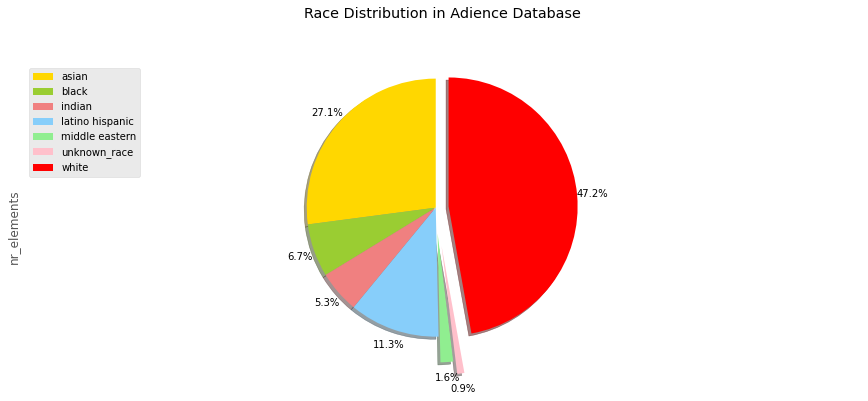

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0, 0, 0, 0, 0.2, 0.3, 0.1] # ratio for each race with which to offset each wedge.

df_race_group['nr_elements'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 races
                            )

# scale the title up by 12% to match pctdistance
plt.title('Race Distribution in Adience Database', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_race_group.index, loc='upper left') 

plt.show()

In [ ]:
# group database by gender and apply sum() function 
df_gender_group = df_gender.groupby('gender_scan', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_gender.groupby('gender_scan', axis=0)))

df_gender_group.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,nr_elements
gender_scan,
Man,33058
Woman,10426
unknown_gender,393


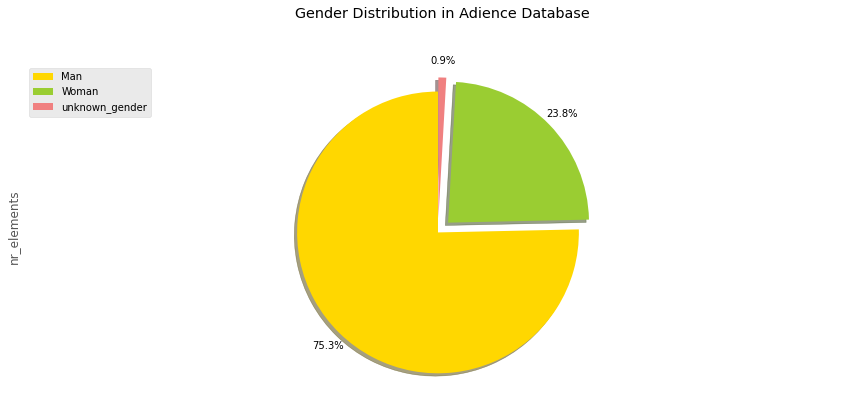

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral']
explode_list = [0, 0.1, 0.1] # ratio for each race with which to offset each wedge.

df_gender_group['nr_elements'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 2 gender
                            )

# scale the title up by 12% to match pctdistance
plt.title('Gender Distribution in Adience Database', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_gender_group.index, loc='upper left') 

plt.show()

In [ ]:
df_race_gender = pd.read_excel('drive/MyDrive/BDV_database/_extractedData_DB2.xlsx',
                       sheet_name='Sheet1', 
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
#display the race database
df_race_gender.head()

,race_scan,Man,Woman,unknown_gender
0,latino hispanic,3676,1288,0
1,indian,1872,453,0
2,black,2556,365,0
3,white,14545,6149,0
4,asian,9757,2125,0


In [ ]:
# group database by gender and apply sum() function 
df_race_gender_man_group = df_race_gender.groupby('race_scan', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_race_gender.groupby('race_scan', axis=0)))

df_race_gender_man_group.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Man,Woman,unknown_gender
race_scan,,,
asian,9757,2125,0
black,2556,365,0
indian,1872,453,0
latino hispanic,3676,1288,0
middle eastern,652,46,0


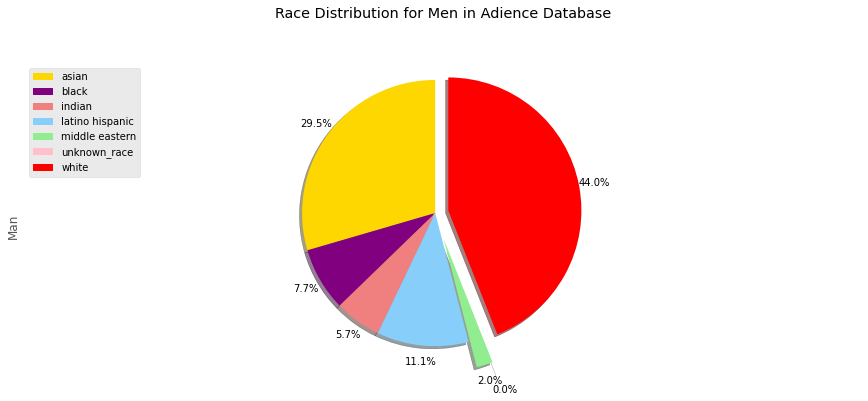

In [ ]:
colors_list = ['gold', 'purple', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0, 0, 0, 0, 0.2, 0.3, 0.1] # ratio for each race with which to offset each wedge.

df_race_gender_man_group['Man'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 races
                            )

# scale the title up by 12% to match pctdistance
plt.title('Race Distribution for Men in Adience Database', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_race_gender_man_group.index, loc='upper left') 

plt.show()

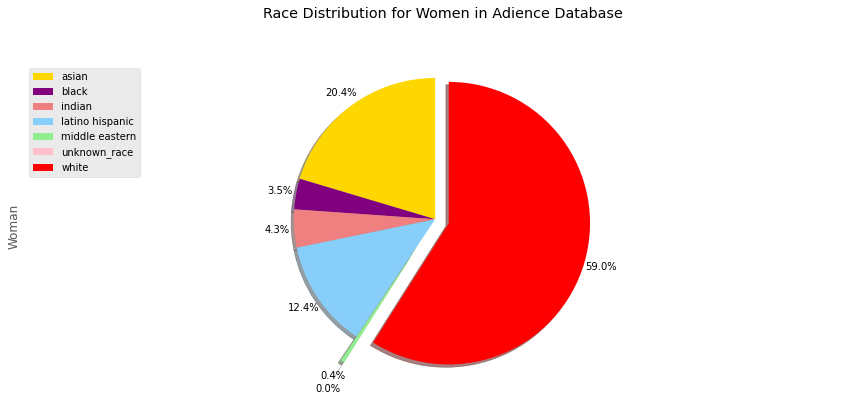

In [ ]:
colors_list = ['gold', 'purple', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0, 0, 0, 0, 0.2, 0.3, 0.1] # ratio for each race with which to offset each wedge.

df_race_gender_man_group['Woman'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 races
                            )

# scale the title up by 12% to match pctdistance
plt.title('Race Distribution for Women in Adience Database', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_race_gender_man_group.index, loc='upper left') 

plt.show()

In [ ]:
df_gender_deepface = pd.read_excel('drive/MyDrive/BDV_database/_genderAccuracyScannedByDeepface.xlsx',
                       sheet_name='Sheet1', 
                      )

print('Data downloaded and read into a dataframe!')

In [ ]:
#display the race database
df_gender_deepface.head()

In [ ]:
# group database by gender and apply sum() function 
df_gender_deepface_group = df_gender_deepface.groupby('Gender', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_gender_deepface.groupby('Gender', axis=0)))

df_gender_deepface_group.head()

In [ ]:
colors_list = ['gold', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0, 0, 0.1, 0.1, 0.1] # ratio for each race with which to offset each wedge.

df_gender_deepface_group['Nr of Matches'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 races
                            )

# scale the title up by 12% to match pctdistance
plt.title('Gender Detection for Deepface Library', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_gender_deepface_group.index, loc='upper left') 

plt.show()

In [ ]:
df_gender_deepface_male = pd.read_excel('drive/MyDrive/BDV_database/_MaleAccuracyScannedByDeepface.xlsx',
                       sheet_name='Sheet1', 
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
#display the race database
df_gender_deepface_male.head()

,Gender,Nr of Matches
0,Male Matches,6561
1,Male Mismatches,1559


In [ ]:
# group database by gender and apply sum() function 
df_gender_deepface_male_group = df_gender_deepface_male.groupby('Gender', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_gender_deepface_male.groupby('Gender', axis=0)))

df_gender_deepface_male_group.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Nr of Matches
Gender,
Male Matches,6561
Male Mismatches,1559


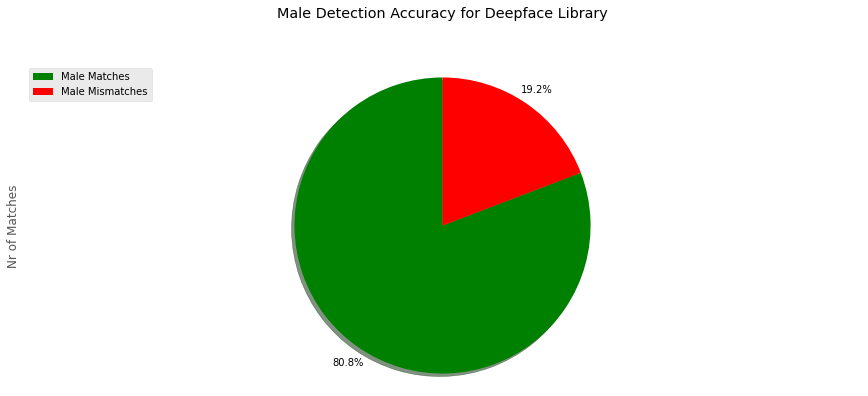

In [ ]:
colors_list = ['green', 'red']
explode_list = [0, 0] # ratio for each race with which to offset each wedge.

df_gender_deepface_male_group['Nr of Matches'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 races
                            )

# scale the title up by 12% to match pctdistance
plt.title('Male Detection Accuracy for Deepface Library', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_gender_deepface_male_group.index, loc='upper left') 

plt.show()

In [ ]:
df_gender_deepface_female = pd.read_excel('drive/MyDrive/BDV_database/_FemaleAccuracyScannedByDeepface.xlsx',
                       sheet_name='Sheet1', 
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
#display the race database
df_gender_deepface_female.head()

,Gender,Nr of Matches
0,Female Matches,2829
1,Female Mismatches,6543


In [ ]:
# group database by gender and apply sum() function 
df_gender_deepface_female_group = df_gender_deepface_female.groupby('Gender', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_gender_deepface_female.groupby('Gender', axis=0)))

df_gender_deepface_female_group.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Nr of Matches
Gender,
Female Matches,2829
Female Mismatches,6543


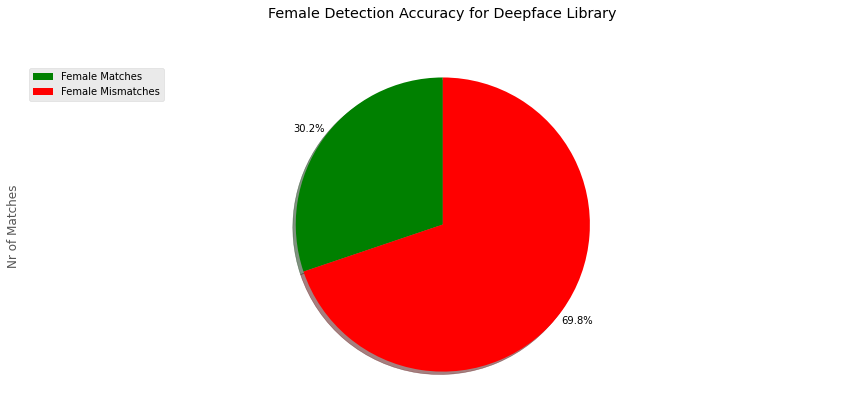

In [ ]:
colors_list = ['green', 'red']
explode_list = [0, 0] # ratio for each race with which to offset each wedge.

df_gender_deepface_female_group['Nr of Matches'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 races
                            )

# scale the title up by 12% to match pctdistance
plt.title('Female Detection Accuracy for Deepface Library', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_gender_deepface_female_group.index, loc='upper left') 

plt.show()